GROUP ASSIGNMENT - Puck de Bruin (1665650), ...

First, install packages

In [21]:
import pandas as pd 
from rdkit.Chem import AllChem
from rdkit import Chem 
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

Read cvs file 

In [22]:
df1 = pd.read_csv('tested_molecules-1.csv')
df1

,SMILES,ALDH1_inhibition
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1
...,...,...
995,COc1ccc(N2C(=O)CC([NH2+]C3CC3)C2=O)cc1,0
996,CCNc1oc(COc2cccc(C)c2)nc1C#N,0
997,NC(=O)Cn1cnc(-c2ccccc2)c1,0
998,Cc1cc(NC(=O)CSc2nc3c(c(=O)n(C)c(=O)n3C)n2C(C)C...,0


In [23]:
df2 = pd.read_csv('tested_molecules_v2.csv')
df2

,SMILES,ALDH1_inhibition
0,[NH3+]CCSSCC[NH3+],0
1,[NH3+]CCC[NH2+]CCCC[NH2+]CCC[NH3+],0
2,[NH3+]CCCCCCCCCC[NH3+],0
3,[NH3+]CCSSCC[NH3+],0
4,ClCC[NH+](CCCl)CCCl,0
...,...,...
995,C/C(=N\NC(=S)Nc1ccc(F)cc1)C1CC1,1
996,COC(=O)c1c(NC(C)=O)sc2c1CCCCC2,1
997,O=C(CCl)NC1CCCc2ccccc21,1
998,COc1ccc(-n2c(SCC(=O)N3CCCCC3C)nnc2-c2cccnc2)cc1,1


In [24]:
df= pd.concat([df1, df2], axis=0)
df

,SMILES,ALDH1_inhibition
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1
...,...,...
995,C/C(=N\NC(=S)Nc1ccc(F)cc1)C1CC1,1
996,COC(=O)c1c(NC(C)=O)sc2c1CCCCC2,1
997,O=C(CCl)NC1CCCc2ccccc21,1
998,COc1ccc(-n2c(SCC(=O)N3CCCCC3C)nnc2-c2cccnc2)cc1,1


Next step is determining which descriptors we are going to use. 

In [25]:
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

In [26]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors = []
    for mol in mols:
        mol=Chem.AddHs(mol)
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors, desc_names

Mol_descriptors, desc_names = RDkit_descriptors(df['SMILES'])

In [27]:
df_with_descriptors = pd.DataFrame(Mol_descriptors, columns=desc_names)
df_with_descriptors

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.648724,14.648724,0.060465,-5.034549,0.520365,463.542,434.310,463.233188,178,0,...,0,0,0,0,1,0,0,0,0,0
1,13.180567,13.180567,0.259504,-3.442212,0.498564,378.457,360.313,378.115047,136,0,...,1,0,0,0,0,0,0,0,0,0
2,10.154031,10.154031,0.626646,-5.536518,0.382043,477.589,444.325,477.260865,184,0,...,0,0,0,0,1,0,0,0,0,0
3,11.964559,11.964559,0.338689,-3.767788,0.795948,330.609,317.505,328.981818,96,0,...,0,0,0,0,0,0,0,0,0,0
4,12.970682,12.970682,0.107779,-5.727217,0.687618,419.553,402.417,419.043204,140,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,13.691100,13.691100,0.017897,-3.332878,0.492481,251.330,237.218,251.089247,90,0,...,0,0,0,0,0,0,0,0,0,0
1996,12.799172,12.799172,0.210081,-3.948066,0.661884,267.350,250.214,267.092914,98,0,...,0,0,0,0,0,0,0,1,0,0
1997,12.223679,12.223679,0.646387,-3.783460,0.767040,223.703,209.591,223.076392,80,0,...,0,0,0,0,0,0,0,0,0,0
1998,14.110619,14.110619,0.366586,-4.404360,0.561228,423.542,398.342,423.172896,156,0,...,1,0,0,0,0,0,0,0,0,0


In [58]:
correlation_matrix = df_with_descriptors.corr().abs()
threshold = 0.9
highly_correlated_columns = []
for column in range(len(correlation_matrix.columns)):
    for row in range(column):
        if correlation_matrix.iloc[column, row] > threshold:
            highly_correlated_columns.append(correlation_matrix.columns[column])
            
df_filtered = df_with_descriptors.drop(columns=highly_correlated_columns)
df_filtered

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.648724,0.060465,-5.034549,0.520365,463.542,0,0.249868,-0.496477,1.323529,10.907235,...,0,0,0,0,1,0,0,0,0,0
1,13.180567,0.259504,-3.442212,0.498564,378.457,0,0.230353,-0.467476,1.259259,11.297748,...,1,0,0,0,0,0,0,0,0,0
2,10.154031,0.626646,-5.536518,0.382043,477.589,0,0.348615,-0.492903,1.485714,10.160364,...,0,0,0,0,1,0,0,0,0,0
3,11.964559,0.338689,-3.767788,0.795948,330.609,0,0.351723,-0.421732,1.555556,11.220549,...,0,0,0,0,0,0,0,0,0,0
4,12.970682,0.107779,-5.727217,0.687618,419.553,0,0.231765,-0.301646,1.518519,12.204811,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,13.691100,0.017897,-3.332878,0.492481,251.330,0,0.192599,-0.331334,1.705882,10.971568,...,0,0,0,0,0,0,0,0,0,0
1996,12.799172,0.210081,-3.948066,0.661884,267.350,0,0.340670,-0.465332,1.444444,10.106796,...,0,0,0,0,0,0,0,1,0,0
1997,12.223679,0.646387,-3.783460,0.767040,223.703,0,0.234904,-0.348256,1.866667,9.968710,...,0,0,0,0,0,0,0,0,0,0
1998,14.110619,0.366586,-4.404360,0.561228,423.542,0,0.232788,-0.496766,1.400000,10.910674,...,1,0,0,0,0,0,0,0,0,0


In [66]:
nunique = df_filtered.nunique()
cols_to_drop = nunique[nunique == 1].index
df_filtered=df_filtered.drop(cols_to_drop, axis=1)
df_filtered

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,BCUT2D_MWLOW,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_urea
0,14.648724,0.060465,-5.034549,0.520365,463.542,0.249868,-0.496477,1.323529,10.907235,-0.245747,...,0,0,0,0,0,1,0,0,0,0
1,13.180567,0.259504,-3.442212,0.498564,378.457,0.230353,-0.467476,1.259259,11.297748,-0.166571,...,0,1,0,0,0,0,0,0,0,0
2,10.154031,0.626646,-5.536518,0.382043,477.589,0.348615,-0.492903,1.485714,10.160364,-0.247542,...,1,0,0,0,0,1,0,0,0,0
3,11.964559,0.338689,-3.767788,0.795948,330.609,0.351723,-0.421732,1.555556,11.220549,-0.249006,...,0,0,0,0,0,0,0,0,0,0
4,12.970682,0.107779,-5.727217,0.687618,419.553,0.231765,-0.301646,1.518519,12.204811,-0.242674,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,13.691100,0.017897,-3.332878,0.492481,251.330,0.192599,-0.331334,1.705882,10.971568,-0.243604,...,0,0,0,0,0,0,0,0,0,0
1996,12.799172,0.210081,-3.948066,0.661884,267.350,0.340670,-0.465332,1.444444,10.106796,-0.245746,...,0,0,0,0,0,0,0,0,1,0
1997,12.223679,0.646387,-3.783460,0.767040,223.703,0.234904,-0.348256,1.866667,9.968710,-0.186025,...,0,0,0,0,0,0,0,0,0,0
1998,14.110619,0.366586,-4.404360,0.561228,423.542,0.232788,-0.496766,1.400000,10.910674,-0.246290,...,0,1,0,0,0,0,0,0,0,0


In [67]:
merged_df = df.join(df_filtered)
merged_df

,SMILES,ALDH1_inhibition,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_urea
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1,14.648724,0.060465,-5.034549,0.520365,463.542,0.249868,-0.496477,1.323529,...,0,0,0,0,0,1,0,0,0,0
0,[NH3+]CCSSCC[NH3+],0,14.648724,0.060465,-5.034549,0.520365,463.542,0.249868,-0.496477,1.323529,...,0,0,0,0,0,1,0,0,0,0
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1,13.180567,0.259504,-3.442212,0.498564,378.457,0.230353,-0.467476,1.259259,...,0,1,0,0,0,0,0,0,0,0
1,[NH3+]CCC[NH2+]CCCC[NH2+]CCC[NH3+],0,13.180567,0.259504,-3.442212,0.498564,378.457,0.230353,-0.467476,1.259259,...,0,1,0,0,0,0,0,0,0,0
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1,10.154031,0.626646,-5.536518,0.382043,477.589,0.348615,-0.492903,1.485714,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,O=C(CCl)NC1CCCc2ccccc21,1,11.703757,0.168127,-3.184275,0.805927,201.229,0.236896,-0.368122,1.600000,...,0,0,0,0,0,0,0,0,0,0
998,Cc1cc(NC(=O)CSc2nc3c(c(=O)n(C)c(=O)n3C)n2C(C)C...,0,13.524189,0.335914,-4.130319,0.644831,392.441,0.331704,-0.359541,1.518519,...,0,1,0,0,0,0,0,0,0,0
998,COc1ccc(-n2c(SCC(=O)N3CCCCC3C)nnc2-c2cccnc2)cc1,1,13.524189,0.335914,-4.130319,0.644831,392.441,0.331704,-0.359541,1.518519,...,0,1,0,0,0,0,0,0,0,0
999,O=C(Cn1nnc2c(cnn2-c2ccccc2)c1=O)NCc1cccs1,0,13.193324,0.177422,-3.605473,0.575368,366.406,0.280885,-0.349596,1.307692,...,0,0,0,0,0,0,0,0,1,0


In [68]:
data_missing=merged_df.isnull()
missing_values=np.where(data_missing)
if len(missing_values[0])==0:
    print("There are no missing values")
else:
    print("The amount of missing values is "+str(len(missing_values[0])))

There are no missing values


In [62]:
df_duplicate = merged_df[merged_df.duplicated()]
if len(df_duplicate)==0:
    print("There are no duplicated rows")
else:
    print("The amount of duplicated rows is "+str(len(df_duplicate)))

There are no duplicated rows


Scale the data with MinMax scaling

In [29]:
minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(df_with_descriptors)
df_minmax = pd.DataFrame(df_minmax, columns=desc_names)
display(df_minmax)


,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.872370,0.872370,0.018185,0.374411,0.492906,0.689213,0.667061,0.689016,0.784946,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.741976,0.741976,0.078075,0.576463,0.466743,0.502704,0.501533,0.502364,0.559140,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.473174,0.473174,0.188548,0.310716,0.326910,0.720005,0.689464,0.719777,0.817204,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.633976,0.633976,0.101902,0.535150,0.823627,0.397819,0.405774,0.394621,0.344086,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.723335,0.723335,0.032421,0.286518,0.693622,0.592788,0.595718,0.592113,0.580645,0.0,...,0.0,0.5,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.787319,0.787319,0.005376,0.590336,0.459444,0.224037,0.226176,0.223814,0.311828,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.708102,0.708102,0.063204,0.512275,0.662740,0.259153,0.255247,0.258908,0.354839,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
1997,0.656990,0.656990,0.194487,0.533162,0.788935,0.163478,0.164376,0.162386,0.258065,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.824579,0.824579,0.110296,0.454376,0.541945,0.601532,0.586602,0.601169,0.666667,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Determine how many principal components are needed for the analysis

,0
1,0.250607
2,0.349500
3,0.399259
4,0.441534
5,0.477694
...,...
205,1.000000
206,1.000000
207,1.000000
208,1.000000


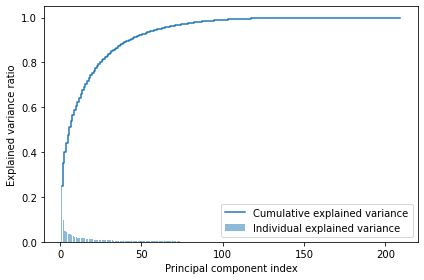

In [30]:
pca = PCA()

# Determine transformed features
df_pca = pca.fit_transform(df_minmax)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
df_cum_sum = pd.DataFrame(cum_sum_eigenvalues)
df_cum_sum.index += 1
display(df_cum_sum)

# Create the visualization plot

plt.bar(range(1,len(exp_var_pca)+1), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Find out what how relavant the features are for the PC's 

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
MaxAbsEStateIndex,0.167980,0.024304,0.035380,0.153161,0.158379,0.101137,0.016344,0.232307,0.041477,0.122299,...,0.022836,0.090446,0.098478,0.042083,0.115446,0.064127,0.095444,0.072666,0.134579,0.037876
MaxEStateIndex,0.167980,0.024304,0.035380,0.153161,0.158379,0.101137,0.016344,0.232307,0.041477,0.122299,...,0.022836,0.090446,0.098478,0.042083,0.115446,0.064127,0.095444,0.072666,0.134579,0.037876
MinAbsEStateIndex,0.046966,0.098364,0.068006,0.019526,0.008221,0.068358,0.045044,0.017060,0.071664,0.030665,...,0.000306,0.160012,0.029931,0.043729,0.121776,0.022723,0.028190,0.005040,0.064578,0.031199
MinEStateIndex,0.144655,0.087120,0.000834,0.033440,0.024344,0.014963,0.142818,0.198740,0.072132,0.053730,...,0.102021,0.161655,0.049465,0.045841,0.112409,0.061562,0.046210,0.019548,0.043750,0.077529
qed,0.055153,0.087503,0.060995,0.034540,0.037957,0.032037,0.096913,0.172440,0.122958,0.134928,...,0.204030,0.133832,0.094186,0.030011,0.119732,0.131539,0.121188,0.094801,0.274413,0.065608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_thiazole,0.017136,0.028152,0.067238,0.018799,0.056603,0.065569,0.074642,0.093171,0.094052,0.141415,...,0.048056,0.045418,0.079002,0.062449,0.087965,0.040383,0.029054,0.033766,0.042201,0.012500
fr_thiocyan,0.000737,0.000984,0.000677,0.000260,0.000479,0.000196,0.001107,0.001791,0.000495,0.001893,...,0.008755,0.000293,0.005583,0.001706,0.003328,0.005998,0.012460,0.001368,0.002421,0.001697
fr_thiophene,0.001691,0.009651,0.081546,0.031020,0.079193,0.019336,0.029461,0.070544,0.015859,0.142596,...,0.059437,0.224768,0.012585,0.025949,0.016193,0.029126,0.125734,0.045173,0.050749,0.063199
fr_unbrch_alkane,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


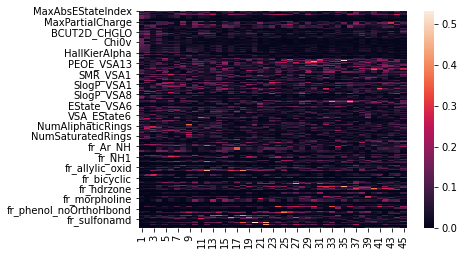

In [31]:
n_components = 45
pca = PCA(n_components = n_components)
components = pca.fit_transform(df_minmax)
df_pc = pd.DataFrame(abs(pca.components_), index=range(1,n_components+1), columns=desc_names).transpose()
display(df_pc)

sn.heatmap(df_pc, annot=False)
plt.show()


Evaluate which features are important per PC

In [32]:
threshold = 0.21
percentage = 95

df_high_value = df_pc[df_pc > threshold]

df_evaluate = df_high_value.transpose()

def show_missing(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output

df_missing = show_missing(df_evaluate)
display(df_missing)

df_missing.drop(df_missing[df_missing['pc_missing'] >= percentage ].index, inplace = True)
df_possible_desc = df_high_value.iloc[df_missing.index,]
display(df_possible_desc)
# df_possible_desc.sum(axis=0)

,variable,dtype,count,unique,missing,pc_missing
0,MaxAbsEStateIndex,float64,45,2,44,97.78
1,MaxEStateIndex,float64,45,2,44,97.78
2,MinAbsEStateIndex,float64,45,1,45,100.00
3,MinEStateIndex,float64,45,1,45,100.00
4,qed,float64,45,4,42,93.33
...,...,...,...,...,...,...
204,fr_thiazole,float64,45,5,41,91.11
205,fr_thiocyan,float64,45,1,45,100.00
206,fr_thiophene,float64,45,4,42,93.33
207,fr_unbrch_alkane,float64,45,1,45,100.00


,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
qed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.274413,NaN
PEOE_VSA11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.217667,NaN,NaN,NaN,NaN
PEOE_VSA12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PEOE_VSA13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.215904,NaN,NaN,NaN,NaN,NaN,NaN
PEOE_VSA6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.230227,NaN,0.291415,NaN,NaN,NaN,NaN,0.268585
SlogP_VSA3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.337267,NaN,NaN,NaN,NaN
SlogP_VSA8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.252977,NaN
EState_VSA3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.406668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VSA_EState9,NaN,NaN,NaN,NaN,NaN,NaN,0.214844,NaN,NaN,NaN,...,NaN,NaN,NaN,0.230090,NaN,NaN,NaN,NaN,NaN,NaN
fr_NH1,NaN,NaN,NaN,NaN,NaN,0.294855,0.271865,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
